In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yellow_cab23 = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine='fastparquet')

In [4]:
print(yellow_cab23.shape)
yellow_cab23.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
zones = pd.read_csv('data/taxi+_zone_lookup.csv')
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [6]:
zones_manh = zones[zones.Borough=='Manhattan']
PUzones_manh = zones_manh.copy()
DOzones_manh = zones_manh.copy()
PUnames = {'LocationID':'PULocationID', 'Borough':'PUBorough', 'Zone':'PUZone', 'service_zone':'PUservice_zone'}
DOnames = {'LocationID':'DOLocationID', 'Borough':'DOBorough', 'Zone':'DOZone', 'service_zone':'DOservice_zone'}
PUzones_manh.rename(columns=PUnames,inplace=True)
DOzones_manh.rename(columns=DOnames,inplace=True)

In [7]:
yellow_cab23_joined = yellow_cab23.merge(PUzones_manh, on = 'PULocationID', how = 'left')
yellow_cab23_joined.head()
# zones.Borough.unique()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Manhattan,Midtown Center,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Manhattan,Clinton East,Yellow Zone
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN,NaN,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Manhattan,Gramercy,Yellow Zone


In [8]:
yellow_cab23_joined = yellow_cab23_joined.merge(DOzones_manh, on = 'DOLocationID', how = 'left')
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,14.30,2.5,0.00,Manhattan,Midtown Center,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,16.90,2.5,0.00,Manhattan,Central Park,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,34.90,2.5,0.00,Manhattan,Clinton East,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,1.0,20.85,0.0,1.25,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,19.68,2.5,0.00,Manhattan,Gramercy,Yellow Zone,Manhattan,East Village,Yellow Zone


In [9]:
yellow_cab23_joined.dropna(subset = ['PUBorough'], inplace = True)
print(yellow_cab23_joined.shape)
yellow_cab23_joined.head()

(2715369, 25)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,14.30,2.5,0.0,Manhattan,Midtown Center,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,16.90,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,34.90,2.5,0.0,Manhattan,Clinton East,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,19.68,2.5,0.0,Manhattan,Gramercy,Yellow Zone,Manhattan,East Village,Yellow Zone
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,1.0,27.80,2.5,0.0,Manhattan,Midtown Center,Yellow Zone,Manhattan,Kips Bay,Yellow Zone


In [10]:
yellow_cab23_joined.drop(['PUBorough', 'DOBorough', 'PUservice_zone', 'DOservice_zone'], axis = 1, inplace = True)
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,Midtown Center,Lenox Hill West
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,0.5,4.00,0.0,1.0,16.90,2.5,0.0,Central Park,Upper East Side South
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,0.5,15.00,0.0,1.0,34.90,2.5,0.0,Clinton East,Upper West Side North
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,Gramercy,East Village
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,1.0,0.5,10.00,0.0,1.0,27.80,2.5,0.0,Midtown Center,Kips Bay


### Zone Mapping:

In [11]:
zone_names = set(list(yellow_cab23_joined.DOZone.unique())+ list(yellow_cab23_joined.PUZone.unique()))

In [12]:
mapping ={
    1 : ['Morningside Heights', 'Manhattanville'],
    2: ['Central Harlem', 'Central Harlem North'],
    3 : ['East Harlem North', 'East Harlem South'],
    4 : ['Bloomingdale', 'Lincoln Square East','Lincoln Square West', 'Manhattan Valley', 'Upper West Side North','Upper West Side South',],
    5 : ['Central Park'],
    6 : [ 'Lenox Hill East', 'Lenox Hill West', 'Upper East Side North','Upper East Side South', 'Yorkville East','Yorkville West'],
    7 : ['Clinton East', 'Clinton West', 'Penn Station/Madison Sq West'],
    8 : ['Midtown Center', 'Midtown East', 'Midtown North', 'Times Sq/Theatre District'],
    9 : [ 'Murray Hill',  'Sutton Place/Turtle Bay North', 'UN/Turtle Bay South'],
    10 : ['East Chelsea', 'Garment District',  'West Chelsea/Hudson Yards'],
    11 : [ 'Flatiron','Midtown South', 'Union Sq'],
    12 : ['Gramercy', 'Kips Bay','Stuy Town/Peter Cooper Village' ],
    13 : ['Meatpacking/West Village West', 'West Village'],
    14 : ['Greenwich Village North', 'Greenwich Village South'],
    15 : ['Alphabet City','East Village'],
    16 : ['Hudson Sq', 'SoHo'],
    17 : [ 'Little Italy/NoLiTa', ],
    18 : [ 'Lower East Side', ],
    19 : ['TriBeCa/Civic Center'],
    20 : ['Chinatown'],
    21 : ['Two Bridges/Seward Park', 'Seaport'],
    22 : ['World Trade Center'],
    23 : ['Battery Park', 'Battery Park City'],
    24 : ['Financial District North', 'Financial District South']
}

In [13]:
mappings_rev={}
for k in mapping.keys():
    mappings_rev[tuple(mapping[k])]=k

In [14]:
def zone_map(locality):
    for i in mappings_rev.keys():
        if locality in i:
            return int(mappings_rev[i])
    return -1

In [15]:
yellow_cab23_joined['PU_CustomZoneID']=yellow_cab23_joined['PUZone'].map(zone_map)
yellow_cab23_joined['DO_CustomZoneID']=yellow_cab23_joined['DOZone'].map(zone_map)

In [16]:
#Removing Rows with Missing Custom Zones
yellow_cab23_joined=yellow_cab23_joined[(yellow_cab23_joined.PU_CustomZoneID!=-1)| (yellow_cab23_joined.DO_CustomZoneID==-1)]

In [17]:
yellow_cab23_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone,PU_CustomZoneID,DO_CustomZoneID
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.00,0.0,1.0,14.30,2.5,0.0,Midtown Center,Lenox Hill West,8,6
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,4.00,0.0,1.0,16.90,2.5,0.0,Central Park,Upper East Side South,5,6
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,15.00,0.0,1.0,34.90,2.5,0.0,Clinton East,Upper West Side North,7,4
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,3.28,0.0,1.0,19.68,2.5,0.0,Gramercy,East Village,12,15
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,10.00,0.0,1.0,27.80,2.5,0.0,Midtown Center,Kips Bay,8,12


### Compute Demand Matrix Pt

In [24]:
# Restricting data to month of January
yellow_cab23_jan23 = yellow_cab23_joined[(yellow_cab23_joined.tpep_pickup_datetime>'2023-01-01 00:00:00') & (yellow_cab23_joined.tpep_pickup_datetime<'2023-02-01 00:00:00')].sort_values(by='tpep_pickup_datetime')

In [25]:
def compute_pt(data_subset):
    pt = np.zeros((24,24))
    for i in range(data_subset.shape[0]):
        x = data_subset.iloc[i,:]
        pt[x[-2]-1,x[-1]-1]+=1
    return pt 

In [26]:

def master_compute_pt(data):
    start = pd.to_datetime('2023-01-01 00:00:00')
    end= start+pd.Timedelta(minutes=30)
    master_pt= compute_pt(data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime'))
    start=end
    
    while start < pd.to_datetime('2023-02-01 00:00:00'):
        print(start)
        end= start+pd.Timedelta(minutes=30)    
        data_subset = data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime')
        pt = compute_pt(data_subset)
        master_pt = np.dstack((master_pt,pt))
        start = end
    return master_pt



In [27]:
master_pt = master_compute_pt(yellow_cab23_jan23)

2023-01-01 00:30:00
2023-01-01 01:00:00
2023-01-01 01:30:00
2023-01-01 02:00:00
2023-01-01 02:30:00
2023-01-01 03:00:00
2023-01-01 03:30:00
2023-01-01 04:00:00
2023-01-01 04:30:00
2023-01-01 05:00:00
2023-01-01 05:30:00
2023-01-01 06:00:00
2023-01-01 06:30:00
2023-01-01 07:00:00
2023-01-01 07:30:00
2023-01-01 08:00:00
2023-01-01 08:30:00
2023-01-01 09:00:00
2023-01-01 09:30:00
2023-01-01 10:00:00
2023-01-01 10:30:00
2023-01-01 11:00:00
2023-01-01 11:30:00
2023-01-01 12:00:00
2023-01-01 12:30:00
2023-01-01 13:00:00
2023-01-01 13:30:00
2023-01-01 14:00:00
2023-01-01 14:30:00
2023-01-01 15:00:00
2023-01-01 15:30:00
2023-01-01 16:00:00
2023-01-01 16:30:00
2023-01-01 17:00:00
2023-01-01 17:30:00
2023-01-01 18:00:00
2023-01-01 18:30:00
2023-01-01 19:00:00
2023-01-01 19:30:00
2023-01-01 20:00:00
2023-01-01 20:30:00
2023-01-01 21:00:00
2023-01-01 21:30:00
2023-01-01 22:00:00
2023-01-01 22:30:00
2023-01-01 23:00:00
2023-01-01 23:30:00
2023-01-02 00:00:00
2023-01-02 00:30:00
2023-01-02 01:00:00


2023-01-09 13:30:00
2023-01-09 14:00:00
2023-01-09 14:30:00
2023-01-09 15:00:00
2023-01-09 15:30:00
2023-01-09 16:00:00
2023-01-09 16:30:00
2023-01-09 17:00:00
2023-01-09 17:30:00
2023-01-09 18:00:00
2023-01-09 18:30:00
2023-01-09 19:00:00
2023-01-09 19:30:00
2023-01-09 20:00:00
2023-01-09 20:30:00
2023-01-09 21:00:00
2023-01-09 21:30:00
2023-01-09 22:00:00
2023-01-09 22:30:00
2023-01-09 23:00:00
2023-01-09 23:30:00
2023-01-10 00:00:00
2023-01-10 00:30:00
2023-01-10 01:00:00
2023-01-10 01:30:00
2023-01-10 02:00:00
2023-01-10 02:30:00
2023-01-10 03:00:00
2023-01-10 03:30:00
2023-01-10 04:00:00
2023-01-10 04:30:00
2023-01-10 05:00:00
2023-01-10 05:30:00
2023-01-10 06:00:00
2023-01-10 06:30:00
2023-01-10 07:00:00
2023-01-10 07:30:00
2023-01-10 08:00:00
2023-01-10 08:30:00
2023-01-10 09:00:00
2023-01-10 09:30:00
2023-01-10 10:00:00
2023-01-10 10:30:00
2023-01-10 11:00:00
2023-01-10 11:30:00
2023-01-10 12:00:00
2023-01-10 12:30:00
2023-01-10 13:00:00
2023-01-10 13:30:00
2023-01-10 14:00:00


2023-01-18 04:00:00
2023-01-18 04:30:00
2023-01-18 05:00:00
2023-01-18 05:30:00
2023-01-18 06:00:00
2023-01-18 06:30:00
2023-01-18 07:00:00
2023-01-18 07:30:00
2023-01-18 08:00:00
2023-01-18 08:30:00
2023-01-18 09:00:00
2023-01-18 09:30:00
2023-01-18 10:00:00
2023-01-18 10:30:00
2023-01-18 11:00:00
2023-01-18 11:30:00
2023-01-18 12:00:00
2023-01-18 12:30:00
2023-01-18 13:00:00
2023-01-18 13:30:00
2023-01-18 14:00:00
2023-01-18 14:30:00
2023-01-18 15:00:00
2023-01-18 15:30:00
2023-01-18 16:00:00
2023-01-18 16:30:00
2023-01-18 17:00:00
2023-01-18 17:30:00
2023-01-18 18:00:00
2023-01-18 18:30:00
2023-01-18 19:00:00
2023-01-18 19:30:00
2023-01-18 20:00:00
2023-01-18 20:30:00
2023-01-18 21:00:00
2023-01-18 21:30:00
2023-01-18 22:00:00
2023-01-18 22:30:00
2023-01-18 23:00:00
2023-01-18 23:30:00
2023-01-19 00:00:00
2023-01-19 00:30:00
2023-01-19 01:00:00
2023-01-19 01:30:00
2023-01-19 02:00:00
2023-01-19 02:30:00
2023-01-19 03:00:00
2023-01-19 03:30:00
2023-01-19 04:00:00
2023-01-19 04:30:00


2023-01-26 17:00:00
2023-01-26 17:30:00
2023-01-26 18:00:00
2023-01-26 18:30:00
2023-01-26 19:00:00
2023-01-26 19:30:00
2023-01-26 20:00:00
2023-01-26 20:30:00
2023-01-26 21:00:00
2023-01-26 21:30:00
2023-01-26 22:00:00
2023-01-26 22:30:00
2023-01-26 23:00:00
2023-01-26 23:30:00
2023-01-27 00:00:00
2023-01-27 00:30:00
2023-01-27 01:00:00
2023-01-27 01:30:00
2023-01-27 02:00:00
2023-01-27 02:30:00
2023-01-27 03:00:00
2023-01-27 03:30:00
2023-01-27 04:00:00
2023-01-27 04:30:00
2023-01-27 05:00:00
2023-01-27 05:30:00
2023-01-27 06:00:00
2023-01-27 06:30:00
2023-01-27 07:00:00
2023-01-27 07:30:00
2023-01-27 08:00:00
2023-01-27 08:30:00
2023-01-27 09:00:00
2023-01-27 09:30:00
2023-01-27 10:00:00
2023-01-27 10:30:00
2023-01-27 11:00:00
2023-01-27 11:30:00
2023-01-27 12:00:00
2023-01-27 12:30:00
2023-01-27 13:00:00
2023-01-27 13:30:00
2023-01-27 14:00:00
2023-01-27 14:30:00
2023-01-27 15:00:00
2023-01-27 15:30:00
2023-01-27 16:00:00
2023-01-27 16:30:00
2023-01-27 17:00:00
2023-01-27 17:30:00


In [29]:
master_pt.shape

(24, 24, 1488)

In [30]:
np.save('data/master_pt_jan',master_pt)

## Frequency distribution of maximum demand in a time unit

(array([310., 128.,  99., 128., 249., 323., 188.,  51.,  11.,   1.]),
 array([  62. ,  530.7,  999.4, 1468.1, 1936.8, 2405.5, 2874.2, 3342.9,
        3811.6, 4280.3, 4749. ]),
 <BarContainer object of 10 artists>)

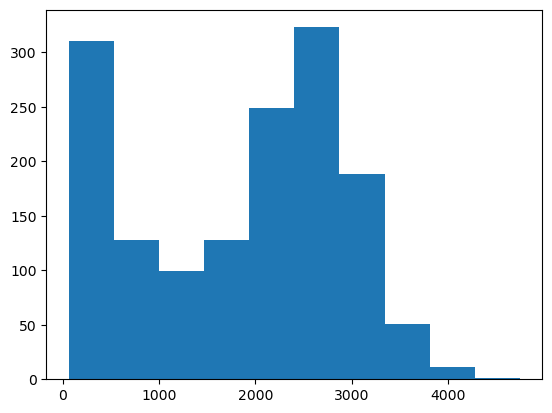

In [31]:
a=[]
for i in range(master_pt.shape[2]):
    a.append(np.sum(master_pt[:,:,i]))
    

plt.hist(a)

### Compute Cost Weight Matrices

In [32]:
wait_costs = np.zeros((24,24))
move_costs = np.zeros((24,24))

In [33]:
for i in range(24):
    for j in range(24):
        temp = yellow_cab23_jan23[(yellow_cab23_jan23.PU_CustomZoneID==i+1) & (yellow_cab23_jan23.DO_CustomZoneID==j+1)]
        avg_trip_dist = temp.trip_distance.sum()/temp.shape[0]
        avg_trip_cost = temp.total_amount.sum()/temp.shape[0]
        move_costs[i,j]=round(avg_trip_dist,2)
        wait_costs[i,j]=round(avg_trip_cost, 2)

In [34]:
wait_costs = (wait_costs-np.min(wait_costs))/(np.max(wait_costs)-np.min(wait_costs))
move_costs = (move_costs-np.min(move_costs))/(np.max(move_costs)-np.min(move_costs))

In [35]:
np.save('data/move_costs', move_costs)
np.save('data/wait_costs', wait_costs)

## Visualizing Demand for the 24 Boroughs

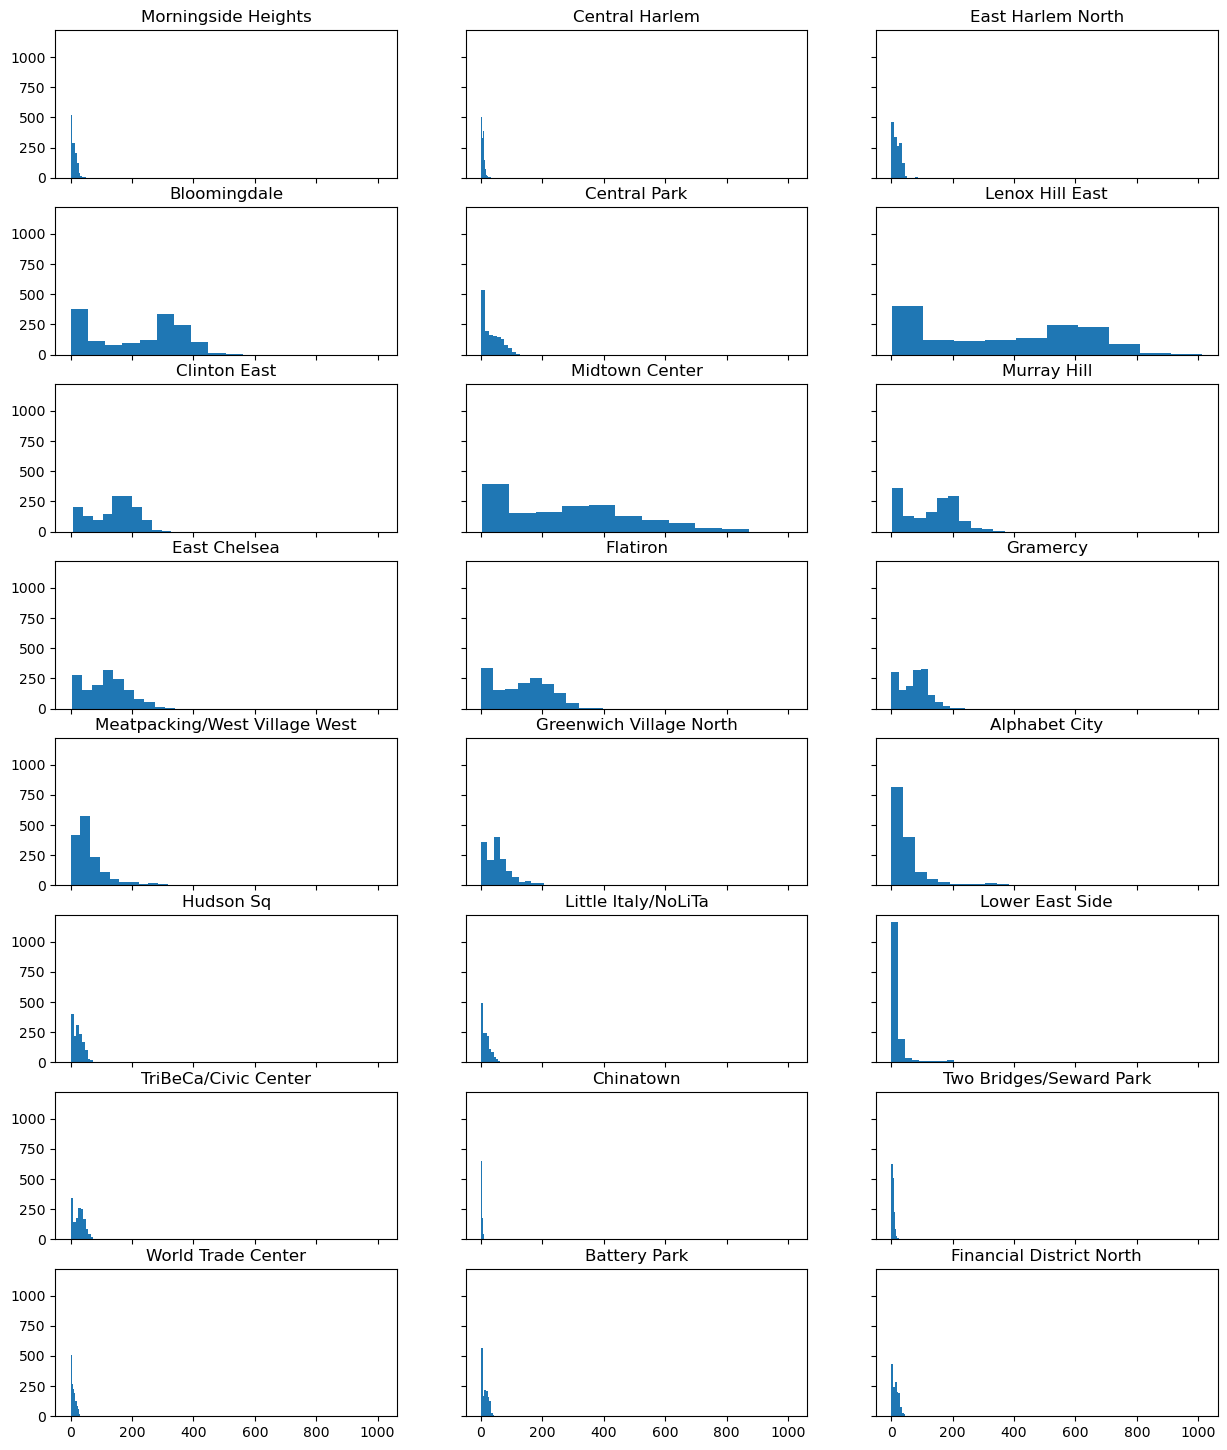

In [49]:
fig, axs = plt.subplots(8,3, sharex=True, sharey = True, figsize = (15,18))
index = 0 
total_demand_per_zone = np.sum(master_pt[:,:,:],axis = 1)
for i in range(8):
    for j in range(3):
        axs[i][j].hist(total_demand_per_zone[index])
        axs[i][j].title.set_text(mapping[index+1][0])
        index+=1

## Transition Function

In [ ]:
# frozen cabs = np.array(24) for each borough -> we might have this as list of tuples where the second item tells for how long they are frozen for

def transition(pt, vt, at, frozen):
    '''
    Parameters:
    pt - Number of passengers who want to go from zone i to j - NxN matrix
    vt - Number of empty vehicles in each zone at time t - Nd matrix 
    at - Cabs Dispatched from zone i to j - NxN matrix 
    frozen - cabs headed to a zone that were frozen at time t-1. They could be frozen due to trips or due to dispatch
    
    Returns
    pt+1 - returns updated demand
    vt+1 - updated empty vehicles and their locations
    '''
    number_of_zones = 24
    
    # Relieving cabs that were frozen in previous time step
    vt = vt + frozen
    
    #freezing displaced cabs
    displaced_cabs = np.sum(at, axis = 0)
    frozen = displaced_cabs
    
    #Distributing cabs based on wait cost of i,j pair
    for i in range(number_of_zones):
        wc = wait_cost[i,:]
        wc_sorted_indices = np.argsort(wc)
        while np.sum(pt[i,:], axis=1)!=0 or vt[i]!=0:
            max_index, wc_sorted_indices = wc_sorted_indices[-1], wc_sorted_indices[:-1]
            if pt[i,max_index] !=0:
                if vt[i]>= pt[i,max_index]:
                    frozen[max_index] += pt[i,max_index] # adding those to frozen cabs
                    vt[i] = vt[i] - pt[i,max_index]
                    pt[i,max_index]=0
                    
                else:
                    frozen[max_index] += vt[i] # adding those to frozen cabs
                    pt[i,max_index] = pt[i,max_index] -vt[i]
                    vt[i]=0
                    
    return pt, vt, frozen #updated demand (insatiated), free cabs and frozen cabs